# **Final Python Notebook 2**

### Author - Sanuli Gehara Jayasekara

### Student ID - 20220855 / w2053019

### Peer Reviewer - Sanjana Sanjeevan


In [28]:
# Import pandas library as pd
import pandas as pd

# Load the cleaned classification dataset
clasification_data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CW Notebooks/datasets/cleaned/cleaned_classification_data.csv')

# Preview the first five rows
print("First 5 rows in Cleaned Classification dataset: ")
clasification_data_frame.head()


First 5 rows in Cleaned Classification dataset: 


,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68,0,0,0,0,1,3,1,4,1,1,24,1,0
1,50,0,1,1,2,0,2,1,35,1,1,14,5,0
2,58,0,2,2,4,0,2,1,63,1,1,14,7,0
3,58,0,0,0,0,1,3,1,18,1,1,2,1,0
4,47,0,1,0,1,1,3,1,41,1,1,3,1,0


In [29]:
# Check data types and non-null counts
print("Data Types and not-null count in Classification dataset: ")
clasification_data_frame.info()


Data Types and not-null count in Classification dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4018 non-null   int64
 1   Sex                     4018 non-null   int64
 2   T_Stage                 4018 non-null   int64
 3   N_Stage                 4018 non-null   int64
 4   6th_Stage               4018 non-null   int64
 5   Differentiated          4018 non-null   int64
 6   Grade                   4018 non-null   int64
 7   A_Stage                 4018 non-null   int64
 8   Tumor_Size              4018 non-null   int64
 9   Estrogen_Status         4018 non-null   int64
 10  Progesterone_Status     4018 non-null   int64
 11  Regional_Node_Examined  4018 non-null   int64
 12  Reginol_Node_Positive   4018 non-null   int64
 13  Mortality_Status        4018 non-null   int64
dtypes: int64(14)
m

## Check Class imbalance in classification dataset

In [30]:
# Display class distribution of Mortality_Status
print("Class Distribution:")
print(clasification_data_frame["Mortality_Status"].value_counts())

Class Distribution:
Mortality_Status
0    3404
1     614
Name: count, dtype: int64


### Visualizing the class imbalance

**Reference**



*   GeeksforGeeks – seaborn.countplot() function, to visualizing class distributions.
 https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/



*   TutorialsPoint – Seaborn Countplot Method
https://www.tutorialspoint.com/seaborn/seaborn_countplot_method.htm



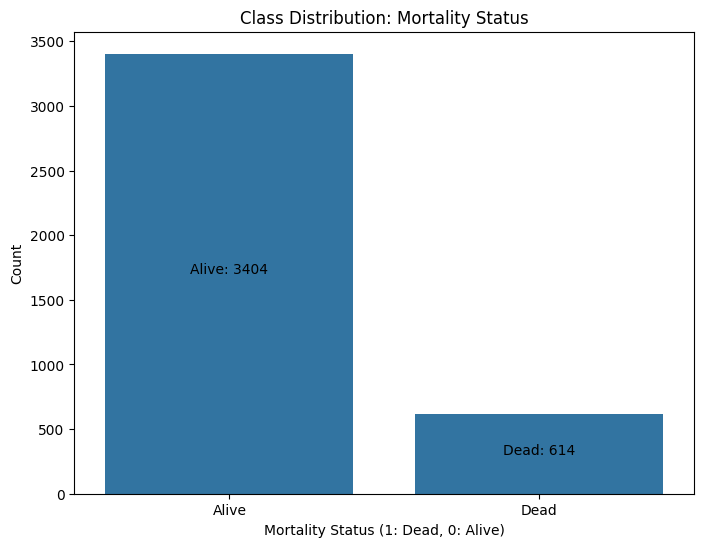

In [31]:
# Import seaborn library
import seaborn as sns
import matplotlib.pyplot as plt # Importing matplotlib for plotting

# Visualize class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Mortality_Status', data=clasification_data_frame)
plt.title('Class Distribution: Mortality Status')
plt.xlabel('Mortality Status (1: Dead, 0: Alive)')
plt.ylabel('Count')
plt.xticks([1, 0], ['Dead', 'Alive'])
plt.annotate(f"Dead: {clasification_data_frame['Mortality_Status'].value_counts()[1]}",
             xy=(1, clasification_data_frame['Mortality_Status'].value_counts()[1]/2),
             ha='center')
plt.annotate(f"Alive: {clasification_data_frame['Mortality_Status'].value_counts()[0]}",
             xy=(0, clasification_data_frame['Mortality_Status'].value_counts()[0]/2),
             ha='center')
plt.show()

## Selecting Variable

Divide the variable columns into two types of variables as dependent(or target variable) and independent variable(or feature variables).

**Reference**



*   Seminar 3 -  'Build and Evaluate Predictive Models with Scikit-Learn' Learning material




In [32]:
# Separate features and target from the dataset
feature_columns = ['Age',	'Sex',	'T_Stage',	'N_Stage',	'6th_Stage',	'Differentiated',	'Grade',	'A_Stage',	'Tumor_Size',	'Estrogen_Status',	'Progesterone_Status',	'Regional_Node_Examined',	'Reginol_Node_Positive']

x = clasification_data_frame[feature_columns]
y = clasification_data_frame['Mortality_Status']  # Storing the target variable


## Transform Inputs Variables (Scaling)

There is a difference in input values in this classification dataset, this can impact the logistic regression performance.

So, used standardization (z-score normalization) to scale input features

**Reference**



*   Seminar 3 -  'Build and Evaluate Predictive Models with Scikit-Learn' Learning material
 *  (Build a Logistic Regression (LR) model to predict patient’s diabetes diagnoses Task - 3. Scale your input variables sub section)



In [33]:
# import StandardScaler library
from sklearn.preprocessing import StandardScaler

# Inititalize StandardScaler
scaler = StandardScaler()

# Scale only the input variables
x1 = scaler.fit_transform(x)

## Splitting Data into training and tests sets

**Reference**

*   Seminar 3 -  'Build and Evaluate Predictive Models with Scikit-Learn' Learning material

*   Code Reuse Session 2 - Split train and test dataset question

In [34]:
# Importing train_test_split function from scikit-learn for dataset splitting
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (80%) and testing (20%) sets
# random_state = 42 : Set the random state to test all models on the same instances
# stratify = y : the labels ratio of mortality stay same in training and test subsets
X_train_imbalanced, X_test, y_train_imbalanced, y_test = train_test_split(x1, y, test_size=0.2, random_state=42, stratify=y)

print("Original Training dataset distribution:")
print(pd.Series(y_train_imbalanced).value_counts())

print('\nWhole Data shape', clasification_data_frame.shape)
print("Original X_train shape:", X_train_imbalanced.shape)
print('X_test shape', X_test.shape)
print('\nFeature names used for built training model:')
print(feature_columns)


Original Training dataset distribution:
Mortality_Status
0    2723
1     491
Name: count, dtype: int64

Whole Data shape (4018, 14)
Original X_train shape: (3214, 13)
X_test shape (804, 13)

Feature names used for built training model:
['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']


## Balancing data with Over-Sampling (SMOTE)

Applied SMOTE (Synthetic Minority Over-sampling Technique) for balancing the training data. Used the imbalanced-learn library which is a widely used Python package that provides various resampling techniques, including SMOTE.

**Reference**

*   GeeksforGeeks Tutorial on SMOTE
https://www.geeksforgeeks.org/smote-for-imbalanced-classification-with-python/

*   Article on Researchgate
https://www.researchgate.net/publication/220543125_SMOTE_Synthetic_Minority_Over-sampling_Technique

In [35]:
 # Import SMOTE to balance the training dataset
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_imbalanced, y_train_imbalanced)

print("After SMOTE - Training set distribution:")
print(pd.Series(y_train).value_counts())

print('\nAfter SMOTE - Whole Data shape', clasification_data_frame.shape)
print("After SMOTE - X_train shape:", X_train.shape)
print("X_test shape (Same):", X_test.shape)
print('\nFeature names used for built training model:')
print(feature_columns)

After SMOTE - Training set distribution:
Mortality_Status
0    2723
1    2723
Name: count, dtype: int64

After SMOTE - Whole Data shape (4018, 14)
After SMOTE - X_train shape: (5446, 13)
X_test shape (Same): (804, 13)

Feature names used for built training model:
['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']


## Instantiate the Model

**Reference**

*  Seminar 3 - 'Build and Evaluate Predictive Models with Scikit-Learn' Learning material
*   Code reuse session 2

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt # Importing matplotlib for plotting

# Initialize and train Gaussian Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model performance
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       681
           1       0.27      0.48      0.34       123

    accuracy                           0.72       804
   macro avg       0.58      0.62      0.58       804
weighted avg       0.79      0.72      0.75       804



## Model Evaluation - Naive Bayes

Below code block is used to evaluate the model by showing classification report, Confusion matrix and ROC curve.


**Reference**

*   Seminar 3 - 'Build and Evaluate Predictive Models with Scikit-Learn' Learning material
*   Code reuse session 2 - Display confustion matrix, roc curve, classification report questions

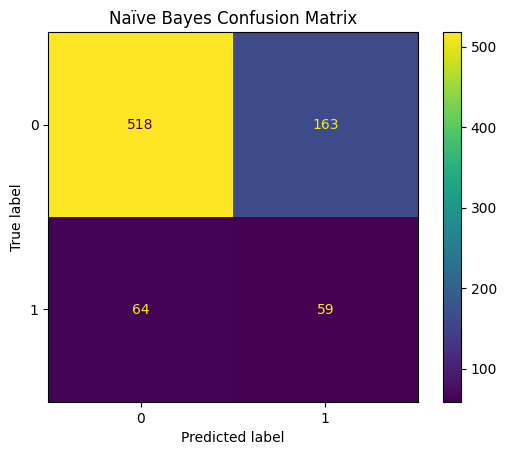

In [37]:
# Show the confusion matrix display
cm_nb = confusion_matrix(y_test, y_pred_nb, labels =nb_model.classes_)
disp_nb = ConfusionMatrixDisplay(cm_nb, display_labels=nb_model.classes_)
disp_nb.plot()
plt.title("Naïve Bayes Confusion Matrix")
plt.show()


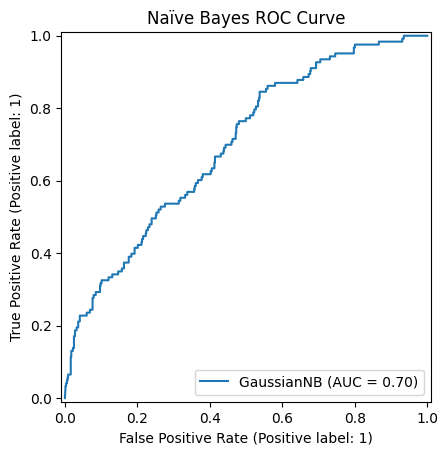

In [38]:
# Generating and displaying the ROC curve for the naives bayes model.
RocCurveDisplay.from_estimator(nb_model, X_test, y_test)
plt.title("Naïve Bayes ROC Curve")
plt.show()


## Instantiate the Model

**Reference**

*  Seminar 3 - 'Build and Evaluate Predictive Models with Scikit-Learn' Learning material
*   Code reuse session 2

In [39]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression
logreg_model = LogisticRegression(class_weight='balanced') # to balance the data
logreg_model.fit(X_train, y_train)
y_pred_lr = logreg_model.predict(X_test)

# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       681
           1       0.28      0.64      0.39       123

    accuracy                           0.70       804
   macro avg       0.60      0.67      0.60       804
weighted avg       0.82      0.70      0.74       804



In [40]:
# Creating a DataFrame to compare the actual and predicted values side by side for further inspection
Comparison_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_lr})

Comparison_df.to_csv('Logistic_Regression_Comparison.csv', index=True)
Comparison_df

,Actual,Predicted
3129,1,1
778,1,0
3867,1,0
4007,0,1
2283,0,1
...,...,...
548,0,0
355,0,0
1553,0,0
1071,0,1


## Model Evaluation - LR

Below code block is used to evaluate the LR model by showing classification report, Confusion matrix and ROC curve.


**Reference**

*   Seminar 3 - 'Build and Evaluate Predictive Models with Scikit-Learn' Learning material
*   Code reuse session 2 - Display confustion matrix, roc curve, classification report questions

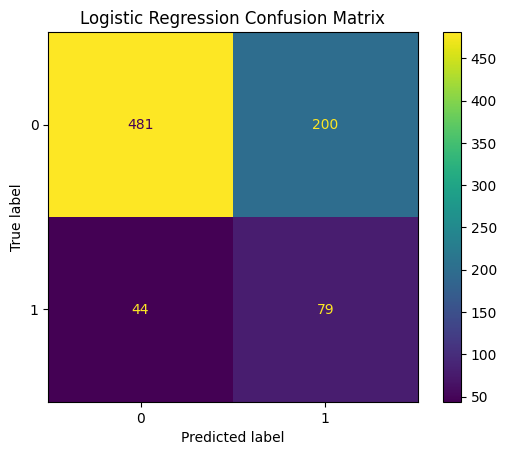

In [41]:
# Show the confusion matrix display for Logistic Regression Model

# Construct the confusion matrix cm_lr
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=logreg_model.classes_)

# Create a display to plot the confusion matrix
disp_lr = ConfusionMatrixDisplay(cm_lr, display_labels=logreg_model.classes_)
disp_lr.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()


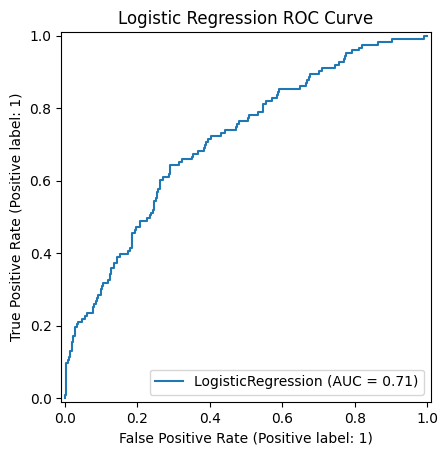

In [42]:
# Generating and displaying the ROC curve
RocCurveDisplay.from_estimator(logreg_model, X_test, y_test)
plt.title("Logistic Regression ROC Curve")
plt.show()


## Instantiate the Model

**Reference**

*  Seminar 3 - 'Build and Evaluate Predictive Models with Scikit-Learn' Learning material
*   Code reuse session 2

In [43]:
#Importing KNN model from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with a default setting
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the data
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Classification report
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       681
           1       0.21      0.47      0.29       123

    accuracy                           0.65       804
   macro avg       0.55      0.58      0.53       804
weighted avg       0.78      0.65      0.70       804



In [44]:
# Creating a DataFrame to compare the actual and predicted values side by side for further inspection
Comparison_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_lr})
Comparison_df

,Actual,Predicted
3129,1,1
778,1,0
3867,1,0
4007,0,1
2283,0,1
...,...,...
548,0,0
355,0,0
1553,0,0
1071,0,1


## Model Evaluation - KNN

Below code block is used to evaluate the KNN model by showing classification report, Confusion matrix and ROC curve.


**Reference**

*   Seminar 3 - 'Build and Evaluate Predictive Models with Scikit-Learn' Learning material
*   Code reuse session 2 - Display confustion matrix, roc curve, classification report questions

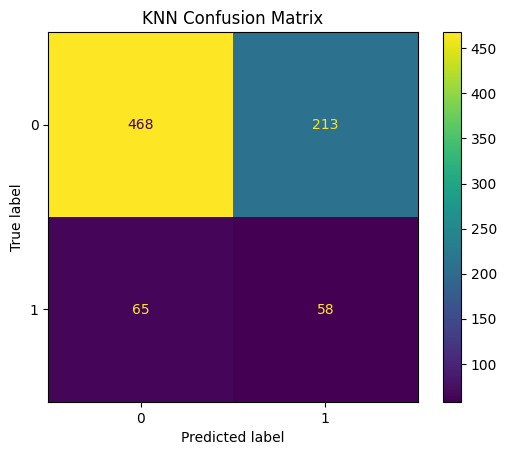

In [45]:
# Generating the confusion matrix for the test set predictions
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn_model.classes_)

# Creating an instance of ConfusionMatrixDisplay to display the confusion matrix with the model's class labels
disp_knn = ConfusionMatrixDisplay(cm_knn, display_labels=knn_model.classes_)
disp_knn.plot()

plt.title("KNN Confusion Matrix")
plt.show()


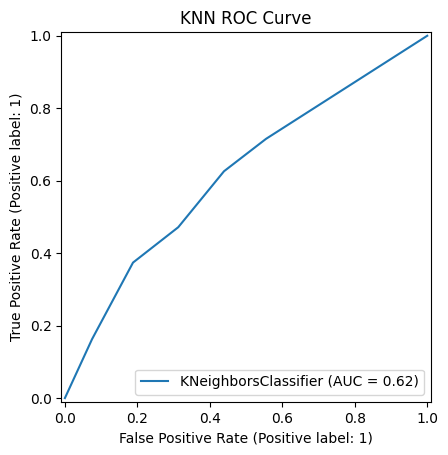

In [46]:
# Generating and displaying the ROC curve for the knn model
RocCurveDisplay.from_estimator(knn_model, X_test, y_test)
plt.title("KNN ROC Curve")
plt.show()

## Hyperparameter Tuning with GridSearchCV
Now apply GridSearchCV to optimize hyperparameters for Naive Bayes, Logistic Regression and KNN Models.

**Reference**


*   Code reuse session 2 - Hyper parameter tuning question



In [47]:
# Importing GridSearchCV from scikit-learn for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score

# Hyperparameter Tuning for Naïve Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, 10)  # Default is 1e-9
}

# Initialize GridSearchCV
# param_grid_nb : the set of params to try
# cv = 5 : use 5-fold cross-validation
# scoring = 'accuracy' : evaluate using accuracy
grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

# Get the best model
best_model_nb = grid_search_nb.best_estimator_
y_pred_best_nb = best_model_nb.predict(X_test)

# Print best hyperparameters and accuracy
print("Best Naïve Bayes Parameters:", grid_search_nb.best_params_)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best_nb))

Best Naïve Bayes Parameters: {'var_smoothing': 0.01}
Tuned Accuracy: 0.722636815920398


## Model Evaluation - Tuned Naive Bayes

Below code block is used to evaluate the tuned model by showing classification report, Confusion matrix and ROC curve.


**Reference**

*   Seminar 3 - 'Build and Evaluate Predictive Models with Scikit-Learn' Learning material
*   Code reuse session 2 - Display confustion matrix, roc curve, classification report questions

Tuned Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       681
           1       0.27      0.48      0.35       123

    accuracy                           0.72       804
   macro avg       0.58      0.62      0.59       804
weighted avg       0.80      0.72      0.75       804



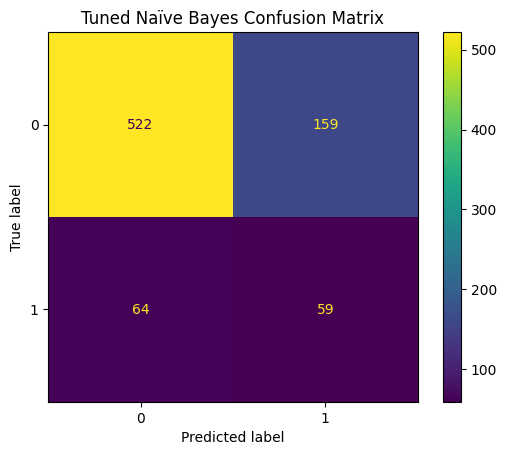

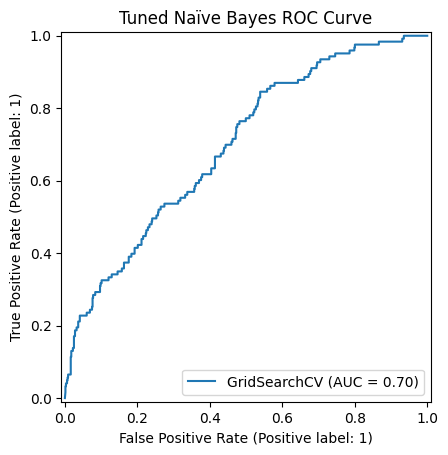

In [48]:
# Evaluating NB model
print("Tuned Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_best_nb))

# Generating and displaying the Confusion Matrix for tuned nb
cm_nb_tuned = confusion_matrix(y_test, y_pred_best_nb, labels = grid_search_nb.classes_)
disp_nb_tuned = ConfusionMatrixDisplay(cm_nb_tuned, display_labels=grid_search_nb.classes_)
disp_nb_tuned.plot()
plt.title("Tuned Naïve Bayes Confusion Matrix")
plt.show()

# Generating and displaying the ROC curve for the nb hyper tuned model
RocCurveDisplay.from_estimator(grid_search_nb, X_test, y_test)
plt.title("Tuned Naïve Bayes ROC Curve")
plt.show()

In [49]:
# Define hyperparameter grid for Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV for Logistic Regression
# param_grid_nb : the set of params to try
# cv = 5 : use 5-fold cross-validation
# scoring = 'roc_auc' : evaluate using roc_auc
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='roc_auc')

# Fit model to data
grid_search_lr.fit(X_train, y_train)  # perform the grid search on the training data

# Evaluate the best Logistic Regression model on the test set
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr_best = best_lr_model.predict(X_test)

# Best hyperparameter C found
print("Best Logistic Regression parameters:", grid_search_lr.best_params_)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_lr_best))

Best Logistic Regression parameters: {'C': 0.1}
Tuned Accuracy: 0.6940298507462687


## Model Evaluation - Tuned LR Model

Below code block is used to evaluate the tuned model by showing classification report, Confusion matrix and ROC curve.


**Reference**

*   Seminar 3 - 'Build and Evaluate Predictive Models with Scikit-Learn' Learning material
*   Code reuse session 2 - Display confustion matrix, roc curve, classification report questions

Logistic Regression (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       681
           1       0.28      0.63      0.39       123

    accuracy                           0.69       804
   macro avg       0.60      0.67      0.59       804
weighted avg       0.82      0.69      0.73       804



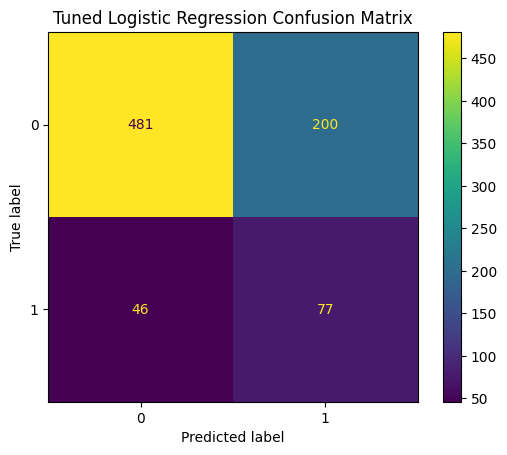

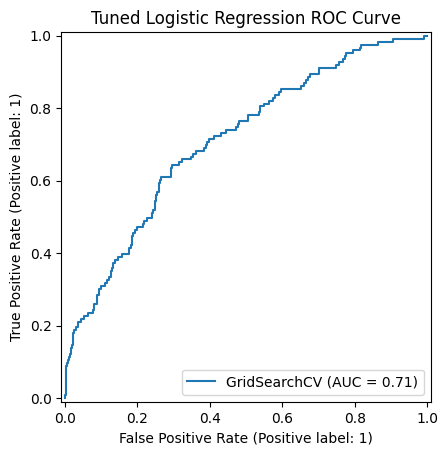

In [50]:
# Evaluation for the tuned lr
print("Logistic Regression (Tuned) Classification Report:")
print(classification_report(y_test, y_pred_lr_best))

# Generating and displaying the Confusion Matrix for tuned LR
cm_lr_tuned = confusion_matrix(y_test, y_pred_lr_best, labels = grid_search_lr.classes_)
disp_lr_tuned = ConfusionMatrixDisplay(cm_lr_tuned, display_labels=grid_search_lr.classes_)
disp_lr_tuned.plot()
plt.title("Tuned Logistic Regression Confusion Matrix")
plt.show()

# Generating and displaying the ROC curve for the LR hyper tuned model
RocCurveDisplay.from_estimator(grid_search_lr, X_test, y_test)
plt.title("Tuned Logistic Regression ROC Curve")
plt.show()

In [51]:
# Hyper Parameter tuning for KNN
# Create a dictionary of all values need to test for n_neighbors and distances
param_grid_knn = {
    'n_neighbors': np.arange(1, 25),
    'metric': ['euclidean', 'manhattan']
}

# Use gridsearch to test all values for n_neighbors
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='roc_auc')

# Fit knn model to data
grid_search_knn.fit(X_train, y_train)

# Get the best model
best_model_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_model_knn.predict(X_test)

# Check best performing n_neighbors’ value
print("Best KNN parameters:", grid_search_knn.best_params_)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best_knn))


Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 4}
Tuned Accuracy: 0.7213930348258707


## Model Evaluation - Tuned KNN Model

Below code block is used to evaluate the tuned model by showing classification report, Confusion matrix and ROC curve.


**Reference**

*   Seminar 3 - 'Build and Evaluate Predictive Models with Scikit-Learn' Learning material
*   Code reuse session 2 - Display confustion matrix, roc curve, classification report questions

Tuned KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       681
           1       0.22      0.33      0.27       123

    accuracy                           0.72       804
   macro avg       0.55      0.56      0.55       804
weighted avg       0.77      0.72      0.74       804



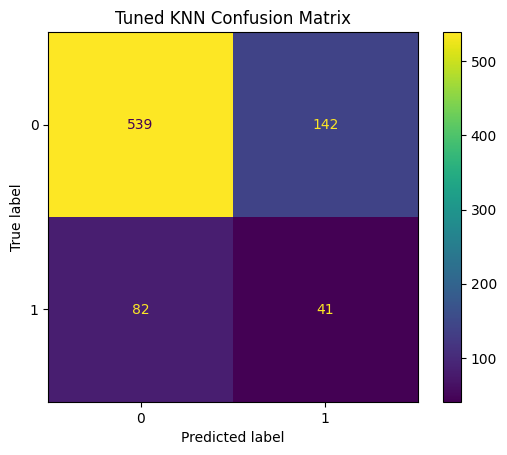

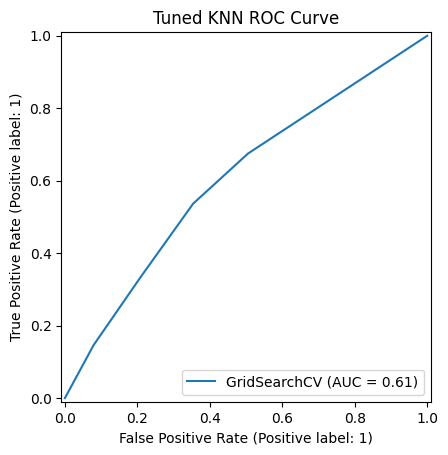

In [52]:
# Perform testing on test dataset
y_pred_knn_best = grid_search_knn.predict(X_test)

# Evaluating KNN model
print("Tuned KNN Classification Report:")
print(classification_report(y_test, y_pred_best_knn))

# Generating and displaying the Confusion Matrix for tuned KNN
cm_knn_tuned = confusion_matrix(y_test, y_pred_best_knn, labels = grid_search_knn.classes_)
disp_knn_tuned = ConfusionMatrixDisplay(cm_knn_tuned, display_labels=grid_search_knn.classes_)
disp_knn_tuned.plot()
plt.title("Tuned KNN Confusion Matrix")
plt.show()

# Generating and displaying the ROC curve for the knn hyper tuned model
RocCurveDisplay.from_estimator(grid_search_knn, X_test, y_test)
plt.title("Tuned KNN ROC Curve")
plt.show()